# Author: Nishant Shah

# Prediction using Decision Tree Algorithm

> <h2> Problem Statement:</h2>  To Explore and Analyse Decision Tree Algorithm on Iris Dataset. It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.


### Importing Libraries

In [122]:
#loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [123]:
#load data
raw_df = pd.read_csv('Iris.csv')
raw_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Description of the Dataset

In [124]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* Info function gives us the following insights into the matches dataframe:

    * There are a total of 150 rows and 5 columns in the dataframe.

    * There are 6 columns with a numeric or float datatype and 1 columns with an object datatype.

    * There are no missing values in any of the columns.

## Preparing the Data for Training

Performing the following steps to prepare the dataset for training:
1. Identifing input and target columns
2. Impute (fill) any missing numeric values
3. Creating a train/test/validation split


The last column "Species" contains the values to be predicted. Hence we drop the intended column from the dataset and store it as a series.

In [125]:
x=raw_df.drop('Species',axis=1)
y=raw_df['Species']

In [126]:
#Summary statistics of matches data
x.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [127]:
x.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Datasets may have missing values, and this can cause problems for many machine learning algorithms.
Hence we need to identify and replace missing values for each column in our input data prior to modeling our prediction task. This is called missing data imputation, or imputing.

We don't have any missing values present.

### Splitting Dataset into train, test and validation sets

The train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that is to be held over for testing. We choose it over to be 20 according to the 80/20 principle where 80 percent is the training set.

The training data is further split into validation set in order to avoid overfitting. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Training

Using `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
model = DecisionTreeClassifier(random_state=42)

In [131]:
%%time
model.fit(X_train, y_train)

Wall time: 2.99 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Evaluation

Evaluating the decision tree using the accuracy score.

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [133]:
train_preds = model.predict(X_train)

In [134]:
train_preds

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virg

In [135]:
pd.value_counts(train_preds)

Iris-virginica     31
Iris-setosa        31
Iris-versicolor    28
dtype: int64

A confusion matrix & classification report contains the number of correct and incorrect predictions of the classification model. 

In [136]:
confusion_matrix(y_train,train_preds)

array([[31,  0,  0],
       [ 0, 28,  0],
       [ 0,  0, 31]], dtype=int64)

In [137]:
print(classification_report(y_train,train_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      1.00      1.00        28
 Iris-virginica       1.00      1.00      1.00        31

       accuracy                           1.00        90
      macro avg       1.00      1.00      1.00        90
   weighted avg       1.00      1.00      1.00        90



Since the accuracy=1.0 the model seems to be 100% accurate. But let's check if theres any overfitting by using the model to predict the validation set.

In [138]:
model.score(X_val, y_val)

0.9

In [139]:
val_preds = model.predict(X_val)

In [140]:
print(classification_report(y_val,val_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.85      0.88        13
 Iris-virginica       0.78      0.88      0.82         8

       accuracy                           0.90        30
      macro avg       0.90      0.91      0.90        30
   weighted avg       0.90      0.90      0.90        30



Although the training accuracy is 100%, the accuracy on the validation set is about 90%.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [141]:
from sklearn.tree import plot_tree, export_text

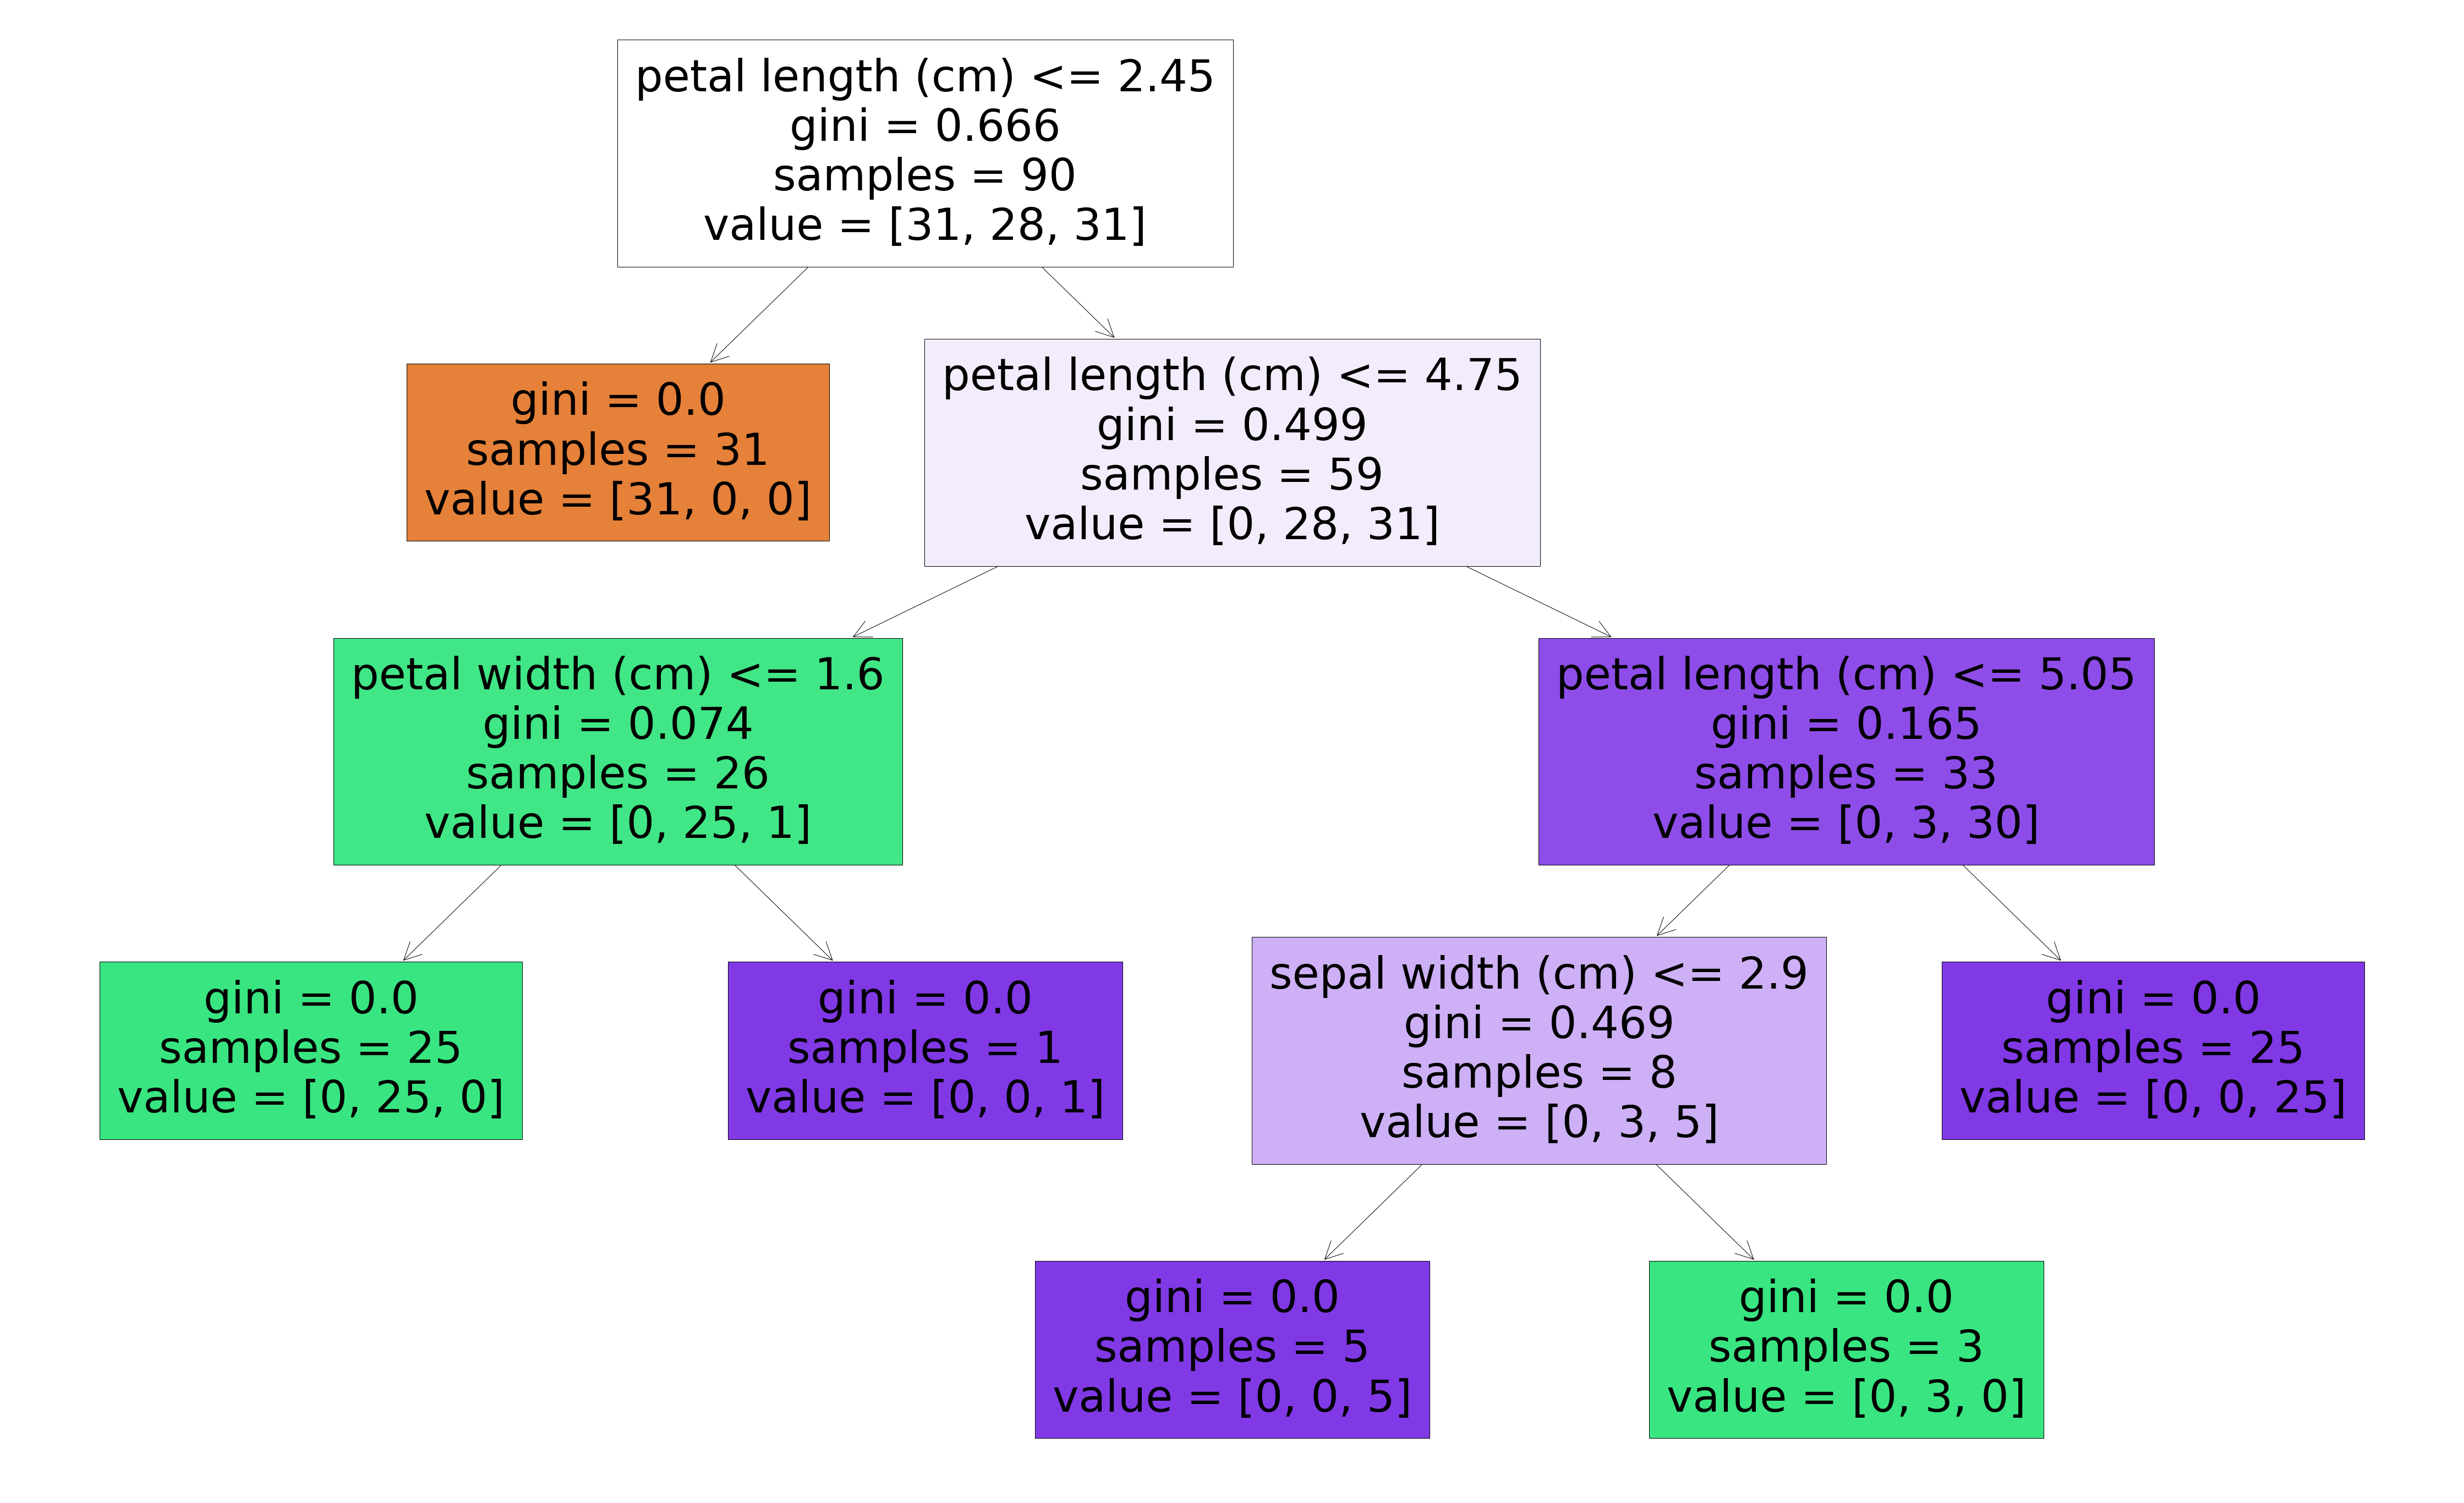

In [142]:
plt.figure(figsize=(80,50))
plot_tree(model, feature_names=X_train.columns, filled=True);

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [143]:
model.feature_importances_

array([0.        , 0.06256952, 0.90534354, 0.03208693])

In [144]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [145]:
importance_df.head()

,feature,importance
2,petal length (cm),0.905344
1,sepal width (cm),0.062570
3,petal width (cm),0.032087
0,sepal length (cm),0.000000


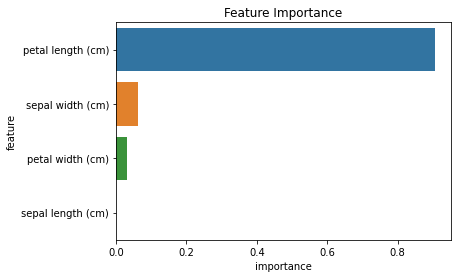

In [146]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning and Overfitting

The Decision Tree seemed to memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was 90%.

The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization.

In [147]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_acc = 1 - model.score(X_train, y_train)
    val_acc = 1 - model.score(X_val, y_val)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [148]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 43.9 ms


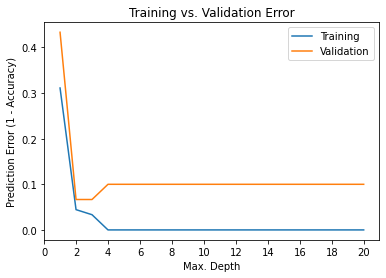

In [149]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

The graph depicts that the model starts overfitting after max depth=3. Thus we limit the Decision Tree depth to 3 which results in the lowest validation error.

### Evaluation

Evaluating the decision tree using the accuracy score.

In [150]:
model = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
model.score(X_val, y_val)

0.9333333333333333

In [151]:
val_preds = model.predict(X_val)

In [152]:
print(classification_report(y_val,val_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



The accuracy increases to 93% against the previous of 90%.

Evaluating the decision tree on the test set:

In [153]:
model.score(X_test, y_test)

0.9666666666666667

In [154]:
test_preds = model.predict(X_test)

In [155]:
print(classification_report(y_test,test_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



Test set accuracy comes out to be 97%.

### Thank You .